# Feature Selection for D-features

## import libraries

In [1]:
import pandas as pd

## load data

In [2]:
dataframe = pd.read_csv('data/all_D_features.csv')
dataframe.head()

,Unnamed: 0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,isFraud
0,0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,0
1,1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0
2,2,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,0
3,3,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,0
4,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## check percentage isFraud

In [3]:
is_fraud_data = dataframe['isFraud']
num_frauds = is_fraud_data[is_fraud_data == 1].sum()
total_num_data = len(is_fraud_data)

print('number of frauds:', num_frauds)
print('total number of data (transaction?):', total_num_data )
print('percentage fraud: {:.3f}'.format(num_frauds / total_num_data  * 100))

number of frauds: 20663
total number of data (transaction?): 590540
percentage fraud: 3.499


## check if NaN is related to isFraud for each column

In [4]:
print(dataframe.loc[dataframe['D14'].isna(), 'isFraud'].sum())

for column in dataframe.columns:
    num_nans = dataframe[column].isna().sum()
    num_nan_frauds = dataframe.loc[dataframe[column].isna(), 'isFraud'].sum()

    print(f'number of NaNs for {column}: {num_nans}')
    print('percentage of NaNs for {}: {:.3f}'.format(column, num_nans / total_num_data * 100))
    print(f'number of NaN frauds: {num_nan_frauds}')
    print(f'percentage of frauds that are from NaNs: {num_nan_frauds / num_frauds * 100}')
    print(f'percentage of total data that are from NaN frauds: {num_nan_frauds / total_num_data * 100}')
    print()

13450
number of NaNs for Unnamed: 0: 0
percentage of NaNs for Unnamed: 0: 0.000
number of NaN frauds: 0
percentage of frauds that are from NaNs: 0.0
percentage of total data that are from NaN frauds: 0.0

number of NaNs for D1: 1269
percentage of NaNs for D1: 0.215
number of NaN frauds: 46
percentage of frauds that are from NaNs: 0.22262014228330834
percentage of total data that are from NaN frauds: 0.007789480814170082

number of NaNs for D2: 280797
percentage of NaNs for D2: 47.549
number of NaN frauds: 12793
percentage of frauds that are from NaNs: 61.91259739631225
percentage of total data that are from NaN frauds: 2.166322349036475

number of NaNs for D3: 262878
percentage of NaNs for D3: 44.515
number of NaN frauds: 11044
percentage of frauds that are from NaNs: 53.44819242123603
percentage of total data that are from NaN frauds: 1.8701527415585735

number of NaNs for D4: 168922
percentage of NaNs for D4: 28.605
number of NaN frauds: 6096
percentage of frauds that are from NaNs: 

## find max and min values for each column (feature)

In [5]:
for column in dataframe.columns:
    print('for column', column)
    print('max value:', dataframe[column].max())
    print('min value:', dataframe[column].min())
    print()

for column Unnamed: 0
max value: 590539
min value: 0

for column D1
max value: 640.0
min value: 0.0

for column D2
max value: 640.0
min value: 0.0

for column D3
max value: 819.0
min value: 0.0

for column D4
max value: 869.0
min value: -122.0

for column D5
max value: 819.0
min value: 0.0

for column D6
max value: 873.0
min value: -83.0

for column D7
max value: 843.0
min value: 0.0

for column D8
max value: 1707.7916259765625
min value: 0.0

for column D9
max value: 0.9583330154418944
min value: 0.0

for column D10
max value: 876.0
min value: 0.0

for column D11
max value: 670.0
min value: -53.0

for column D12
max value: 648.0
min value: -83.0

for column D13
max value: 847.0
min value: 0.0

for column D14
max value: 878.0
min value: -193.0

for column D15
max value: 879.0
min value: -83.0

for column isFraud
max value: 1
min value: 0



## reduce NaN

- first glance of data shows that a lot of columns have a lot of NaN
- gonna start by removing columns with more than 50% NaN

In [6]:
less_nan_dataframe = dataframe.loc[:, dataframe.isna().mean() < 0.3]
less_nan_dataframe.head()

,Unnamed: 0,D1,D4,D10,D15,isFraud
0,0,14.0,NaN,13.0,0.0,0
1,1,0.0,0.0,0.0,0.0,0
2,2,0.0,0.0,0.0,315.0,0
3,3,112.0,94.0,84.0,111.0,0
4,4,0.0,NaN,NaN,NaN,0


In [7]:
print(less_nan_dataframe.isna().mean() * 100)

Unnamed: 0     0.000000
D1             0.214888
D4            28.604667
D10           12.873302
D15           15.090087
isFraud        0.000000
dtype: float64


## read up on Kenneth's resources - abandoning previous attempts

## check for feature correlation

In [8]:
# reference: 
# https://gist.github.com/dradecic/f8d32045aa886756f59adc1ca50eabd1

correlated_features = set()
correlation_matrix = dataframe.drop('isFraud', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

{'D2', 'D6', 'D12', 'D7'}


## drop correlated features

In [9]:
no_correlated_dataframe = dataframe.drop(correlated_features, axis=1)

no_correlated_dataframe.head()

,Unnamed: 0,D1,D3,D4,D5,D8,D9,D10,D11,D13,D14,D15,isFraud
0,0,14.0,13.0,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,0.0,0
1,1,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0
2,2,0.0,NaN,0.0,NaN,NaN,NaN,0.0,315.0,NaN,NaN,315.0,0
3,3,112.0,0.0,94.0,0.0,NaN,NaN,84.0,NaN,NaN,NaN,111.0,0
4,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## import classes required for RFE

In [13]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold

## do recursive feature elimination

In [15]:
%%time

no_is_fraud_dataframe = no_correlated_dataframe.drop('isFraud', axis=1)

# replace NaN with mean
no_is_fraud_dataframe.fillna(no_is_fraud_dataframe.mean(), inplace=True)

rfc = RandomForestClassifier()
rfecv = RFECV(rfc, scoring='accuracy', n_jobs=4, verbose=1)

rfecv.fit(no_is_fraud_dataframe, is_fraud_data)

print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 12
CPU times: user 4min 9s, sys: 344 ms, total: 4min 10s
Wall time: 47min 14s


## plot of accuracy vs number of features

In [17]:
import matplotlib.pyplot as plt

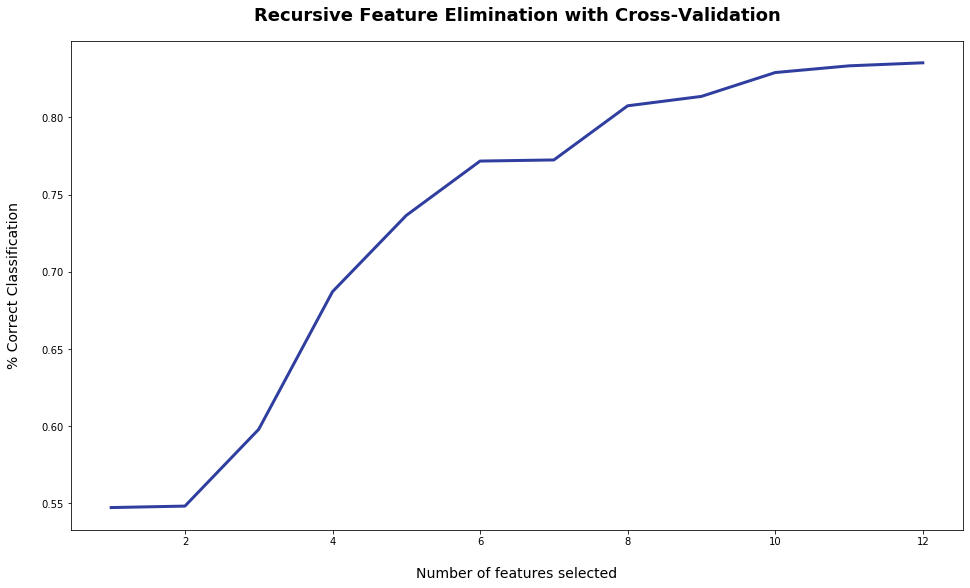

In [18]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

## plot feature importance

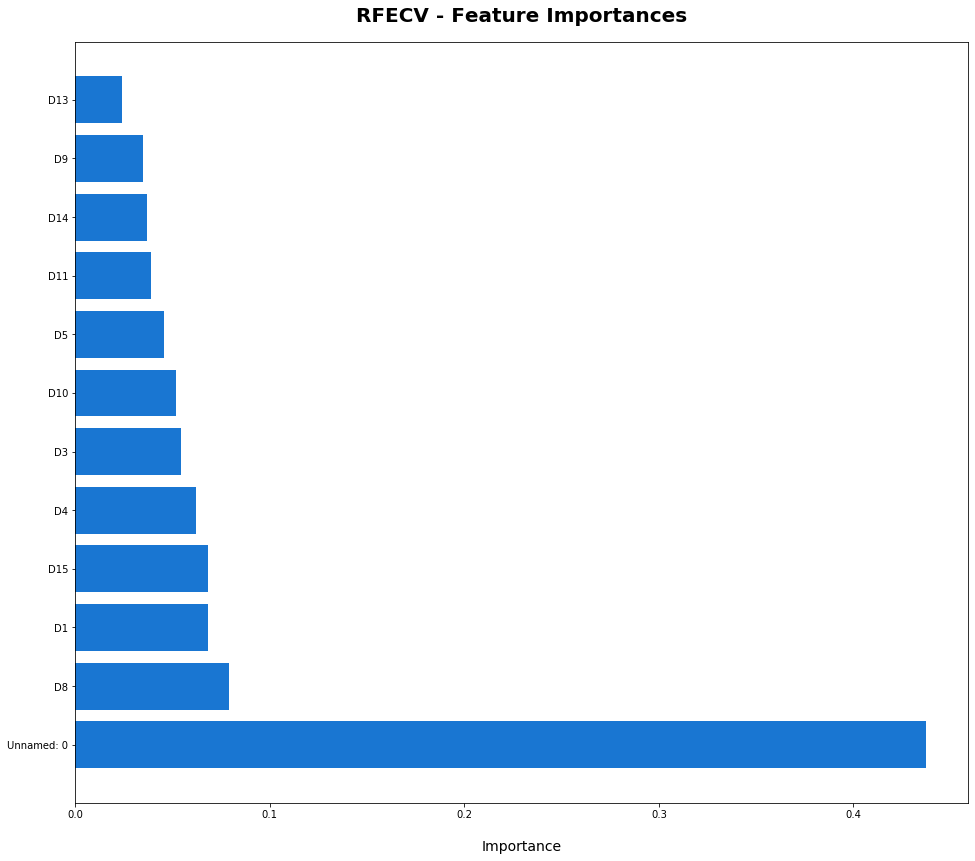

In [20]:
dset = pd.DataFrame()
dset['attr'] = no_is_fraud_dataframe.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

## TODO: redo RFE without unnamed: 0